***
# from ztfquery import fritz
***

### ztfquery.query enables you to get information from the ZTF-II "fritz marshal". 
It corresponds to alert and assocated informations.

ztfquery.fritz basically is a python wrapper of the fritz version of the skyportal web API (https://docs.fritz.science/api.html)

**Note**: you will need a token from you fritz account (https://fritz.science/profile)


**This tutorial will focus on Sample access and user accounts **, 

- see Fritz 2.2 for storing and retrieving data.
- see Fritz 2.1 for individual target data (lightcurve, alerts, spectra, source information)



You will be able to download, for a given target, its:

    - Samples (i.e. 'sources')
    - user account
    - groups

You will use for that `fritz.download_{this}` with `this` being is any of these. 
You can either get the data as they are in Frizt, or use dedicated `Fritz{Object}` that have useful methods. 

***
# Step 0: imports

In [1]:
%matplotlib notebook
from ztfquery import fritz

***
# Fritz Groups


Fritz organise `source`s in groups, like `"Same host SNe"`, each group has its own `id`. The `FritzGroup` object enables you to see all the existing groups and, most importantly, to go from `id` to `groupname` using the `FritzGroup.fetch_groupname(id)` and `FritzGroup.fetch_groupid(group_name)` class method.

As usual the `download_groups()` enables to get the group object. In practice, you don't really need that. 

The `FritzGroups.load()` is similar to the usual `.from_name()` class method. It dowloads the groups data and store them in `$ZTFDATA/sample/fritz_groups.json` such that next time you call the function is it will be much faster. use `force_dl=True` to update the file

In [2]:
group = fritz.FritzGroups.load() 

In [3]:
group.data

,modified,nickname,id,private,single_user_group,name,created_at
0,2020-11-30T08:49:10.252369,acai,217,False,False,ACAI,2020-11-30T08:49:10.252369
1,2020-12-03T02:34:16.003443,acai_tns,226,False,False,ACAI_TNS,2020-12-03T02:34:16.003443
2,2020-10-28T00:52:37.590023,agnflare,71,False,False,AGN Flares,2020-10-28T00:52:37.590023
3,2021-03-04T04:15:45.629195,AMCVn,256,False,False,AMCVn,2021-03-04T04:15:45.629195
4,2020-10-25T21:19:31.751195,AGt1,63,False,False,AmpelGroup_test1,2020-10-25T21:19:31.751195
...,...,...,...,...,...,...,...
79,2020-10-21T06:20:34.588728,young,52,False,False,Young Type Ia Supernovae,2020-10-21T06:20:34.588728
80,2020-11-24T20:05:58.713932,associates,213,False,False,ZTF II Associates,2020-11-24T20:05:58.713932
81,2020-10-21T06:20:34.665079,nuc,58,False,False,ZTFBH Nuclear,2020-10-21T06:20:34.665079
82,2020-10-26T16:33:05.875241,ZTFReST,64,False,False,ZTFReST,2020-10-26T16:33:05.875241


### Check the groups you have access to:

In [4]:
group.accessible

,modified,nickname,id,private,single_user_group,name,created_at
0,2020-10-25T21:19:31.751195,AGt1,63,False,False,AmpelGroup_test1,2020-10-25T21:19:31.751195
1,2021-02-10T14:58:35.802774,None,253,False,False,Calibrator SNe Ia,2021-02-10T14:58:35.802774
2,2020-10-21T06:20:34.627473,cos,55,False,False,Cosmology with Type Ia Supernovae,2020-10-21T06:20:34.627473
3,2020-10-21T06:20:34.549465,infant,49,False,False,Infant Supernovae,2020-10-21T06:20:34.549465
4,2020-11-02T21:16:05.759655,None,80,False,False,Nuclear Transients,2020-11-02T21:16:05.759655
5,2020-11-05T19:00:21.569886,SWGSN,88,False,False,Physics of Transients,2020-11-05T19:00:21.569886
6,2021-03-03T21:11:03.904431,RCFJunk,255,False,False,RCF Junk and Variables,2021-03-03T21:11:03.904431
7,2020-10-21T06:20:34.429576,rcf,41,False,False,Redshift Completeness Factor,2020-10-21T06:20:34.429576
8,2020-11-09T19:40:43.560360,IN2P3MR,125,False,False,Rigault Research Group,2020-11-09T19:40:43.560360
9,2021-02-08T12:55:52.389835,samehost,251,False,False,Same host SNe,2021-02-08T12:55:52.389835


the `group.groupid_to_groupname()` and `group.groupname_to_groupid()` enables yuse to do the conversion once the group object is loaded. 

Again, you are invited to use `fetch_groupname(groupid)` this looks for the `groupid` in the `groups.data["id"]` and returns the corresponding name. If none are found, `fetch_groupname` update the group data by redownloading it and retries

#### Example,  get the id of the "Same host SNe"

In [5]:
fritz.FritzGroups.fetch_groupid("Same host SNe")

251

In [6]:
fritz.FritzGroups.fetch_groupname(251, nickname=True)

'samehost'

In [7]:
g = fritz.FritzGroups.load()

In [8]:
g.data

,modified,nickname,id,private,single_user_group,name,created_at
0,2020-11-30T08:49:10.252369,acai,217,False,False,ACAI,2020-11-30T08:49:10.252369
1,2020-12-03T02:34:16.003443,acai_tns,226,False,False,ACAI_TNS,2020-12-03T02:34:16.003443
2,2020-10-28T00:52:37.590023,agnflare,71,False,False,AGN Flares,2020-10-28T00:52:37.590023
3,2021-03-04T04:15:45.629195,AMCVn,256,False,False,AMCVn,2021-03-04T04:15:45.629195
4,2020-10-25T21:19:31.751195,AGt1,63,False,False,AmpelGroup_test1,2020-10-25T21:19:31.751195
...,...,...,...,...,...,...,...
79,2020-10-21T06:20:34.588728,young,52,False,False,Young Type Ia Supernovae,2020-10-21T06:20:34.588728
80,2020-11-24T20:05:58.713932,associates,213,False,False,ZTF II Associates,2020-11-24T20:05:58.713932
81,2020-10-21T06:20:34.665079,nuc,58,False,False,ZTFBH Nuclear,2020-10-21T06:20:34.665079
82,2020-10-26T16:33:05.875241,ZTFReST,64,False,False,ZTFReST,2020-10-26T16:33:05.875241


***
# Sample

You can download a group `sample` corresponding to the list of individual `source` from this group using the `fritz.download_sample()` function. It contains the usual `get_object`, `store` options but also many options wto filter the data queried to fritz. (see also `fritz.download_sources()`)


The `FritzSample` object is a collection of Sources and contains the following useful attributes:
- `sources`: list of FritzSource 
- `nsource`: number of sources
- `names`: names of the sources
- `data`: DataFrame containing a summary of the indivudual source information (like ra, dec, redshift, classification)
- `groupid`, `groupname` and `groupnickname`: ID, name and nickname of the sample group is any

and then has the usual I/O methods:
- `store()`: store the `data` attribute into `$ZTFDATA/sample/fritz_sample_{id_}.json` where id_ is by default `groupnickname`.  This can later be reloaded using the `read_{extension}()` class method
- `store_sources()`: store the individual sources into `$ZTFDATA/source/`. This call each `source.store()`. Remark that the `store_sources` option from `store()` enables to call `store_sources()` from `store()`.

- `to_{extension}(filename)`, `read_{extension}(filename)`: where {extension} could be `csv`, `json`, `parquet`, `hdf`

In addition:
- `get_source(name)`: returns the `FritzSource` associated to the given name
- `fetch_data()`: bulk download, in parallel the data assocated to your sample, could be `lightcurve`, `spectra`, `alerts` (or source but this is useless)



Most likely the methods you are going to use to instanciate the object are :

- `FritzSample.from_group()`: loads the object given a groupname or a groupid (similar to the `from_name()` classmethod). **important**: `force_dl=True` forces to update the source list of the group. `update_sources` forces to re-download the individual sources (corresponds the `force_dl=True` to `Source.from_name()`)


- `FritzSample.from_names()`:


2. Sample data download.


`fetch_data()` will basically run the `.from_name()` of the individual lightcurve, spectra etc. It then has access to the same tricks as before, except if `force_dl=True`, it downloads only the object not stored yet. By default, `fetch_data()` store the object it downloads.

`fetch_data()` uses the `fritz.bulk_download()` function

In [2]:
%time cosmo_sources = fritz.download_sample(groupid=251, get_object=True)

CPU times: user 72.1 ms, sys: 22.7 ms, total: 94.8 ms
Wall time: 7.8 s


In [10]:
%time cosmo_sources.store_sources()

CPU times: user 66.5 ms, sys: 33.6 ms, total: 100 ms
Wall time: 224 ms


In [3]:
cosmo_sources.store()

In [4]:
c = fritz.FritzSample.read_csv("/Users/mrigault/Data/ZTF/fritz/sample/fritz_sample_samehost.csv", load_sources=True)

### Directly using from_group()

In [7]:
%time fsample = fritz.FritzSample.from_group("Calibrator SNe Ia")

CPU times: user 80.1 ms, sys: 28.1 ms, total: 108 ms
Wall time: 2.21 s


In [8]:
fsample.store()

## Access a large sample, use of Dask (multiprocessing 4 by default)

In [11]:
summary = fritz.download_sample( fritz.FritzGroups.fetch_groupid("rcf"), savesummary=True)

In [17]:
len(summary["sources"])

7831

In [22]:
print(f"This sample has {len(summary['sources'])} targets, so let's use Dask to download all in parallel")

This sample has 7831 targets, so let's use Dask to download all in parallel


another way to see it.

In [27]:
%time s = fritz.FritzSample.from_group("rcf", load_sources=False)

CPU times: user 386 ms, sys: 82.9 ms, total: 469 ms
Wall time: 2.76 s


In [28]:
len(s.names)

7831

In [30]:
from dask.distributed import Client

#client = Client(n_workers=16)
client = Client(processes = True) # faster I think
client

Client Scheduler: tcp://127.0.0.1:51230 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 17.18 GB


In [ ]:
%time s = fritz.FritzSample.from_group("rcf", load_sources=True, client=client)

### Check you `$ZTFDATA/fritz/lightcurve directory`

In [32]:
import os

In [35]:
os.listdir(os.path.join(fritz.FRITZSOURCE,"lightcurve"))

['fritz_lightcurve_ZTF18aahmxqa.csv',
 'fritz_lightcurve_ZTF19abpyqog.csv',
 'fritz_lightcurve_ZTF18adachwf.csv',
 'fritz_lightcurve_ZTF20aaqvzko.csv',
 'fritz_lightcurve_ZTF19acnwelq.csv',
 'fritz_lightcurve_ZTF18aamdfcw.csv',
 'fritz_lightcurve_ZTF20abptxls.csv',
 'fritz_lightcurve_ZTF18abnucig.csv',
 'fritz_lightcurve_ZTF19aatzlmw.csv',
 'fritz_lightcurve_ZTF20abydkrl.csv',
 'fritz_lightcurve_ZTF20abhjesj.csv',
 'fritz_lightcurve_ZTF19acdtmwh.csv',
 'fritz_lightcurve_ZTF21aajfpwk.csv',
 'fritz_lightcurve_ZTF19aacxwfb.csv',
 'fritz_lightcurve_ZTF20aaelulu.csv',
 'fritz_lightcurve_ZTF18aawmvbj.csv',
 'fritz_lightcurve_ZTF18abdffeo.csv',
 'fritz_lightcurve_ZTF20aavpwxl.csv',
 'fritz_lightcurve_ZTF20aagnbpw.csv',
 'fritz_lightcurve_ZTF21aaaollj.csv',
 'fritz_lightcurve_ZTF20acebweq.csv',
 'fritz_lightcurve_ZTF20acpwjus.csv',
 'fritz_lightcurve_ZTF19aamhgwm.csv',
 'fritz_lightcurve_ZTF19aaloezs.csv',
 'fritz_lightcurve_ZTF19abkfqqp.csv',
 'fritz_lightcurve_ZTF19aambfxc.csv',
 'fritz_ligh

### And the returned dictionary

In [36]:
lc

{'ZTF17aadlxmv': <ztfquery.fritz.FritzPhotometry at 0x7fb4455afcd0>,
 'ZTF18aagrcfl': <ztfquery.fritz.FritzPhotometry at 0x7fb445594a30>,
 'ZTF18aahmxqa': <ztfquery.fritz.FritzPhotometry at 0x7fb445594ac0>,
 'ZTF18aakaljn': <ztfquery.fritz.FritzPhotometry at 0x7fb446017670>,
 'ZTF18aakecej': <ztfquery.fritz.FritzPhotometry at 0x7fb4455af730>,
 'ZTF18aamdfcw': <ztfquery.fritz.FritzPhotometry at 0x7fb445d23130>,
 'ZTF18aaqcozd': <ztfquery.fritz.FritzPhotometry at 0x7fb445d233d0>,
 'ZTF18aasdted': <ztfquery.fritz.FritzPhotometry at 0x7fb445d23490>,
 'ZTF18aawmvbj': <ztfquery.fritz.FritzPhotometry at 0x7fb445d6b970>,
 'ZTF18aazgfkq': <ztfquery.fritz.FritzPhotometry at 0x7fb445d23a90>,
 'ZTF18abdbysy': <ztfquery.fritz.FritzPhotometry at 0x7fb4455af1f0>,
 'ZTF18abdffeo': <ztfquery.fritz.FritzPhotometry at 0x7fb4455affd0>,
 'ZTF18abdgwvs': <ztfquery.fritz.FritzPhotometry at 0x7fb445d23970>,
 'ZTF18abdmgab': <ztfquery.fritz.FritzPhotometry at 0x7fb4455943a0>,
 'ZTF18abktzep': <ztfquery.fritz.F

In [37]:
lightcurve_of_one = lc["ZTF18abdgwvs"]

In [38]:
lightcurve_of_one.data

,obj_id,ra,dec,filter,mjd,instrument_id,instrument_name,ra_unc,dec_unc,origin,id,groups,mag,magerr,magsys,limiting_mag
0,ZTF18abdgwvs,NaN,NaN,ztfg,58269.317095,1,ZTF,NaN,NaN,NaN,18193753,"[251, 30]",NaN,NaN,ab,19.208401
1,ZTF18abdgwvs,NaN,NaN,ztfr,58269.356528,1,ZTF,NaN,NaN,NaN,18193754,"[251, 30]",NaN,NaN,ab,18.867800
2,ZTF18abdgwvs,NaN,NaN,ztfr,58272.332917,1,ZTF,NaN,NaN,NaN,18193755,"[251, 30]",NaN,NaN,ab,20.041300
3,ZTF18abdgwvs,NaN,NaN,ztfg,58272.378843,1,ZTF,NaN,NaN,NaN,18193756,"[251, 30]",NaN,NaN,ab,20.158001
4,ZTF18abdgwvs,NaN,NaN,ztfr,58275.338623,1,ZTF,NaN,NaN,NaN,18193757,"[251, 30]",NaN,NaN,ab,20.526600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,ZTF18abdgwvs,NaN,NaN,ztfr,59137.101435,1,ZTF,NaN,NaN,NaN,18193855,"[251, 30]",NaN,NaN,ab,20.424700
103,ZTF18abdgwvs,267.021763,23.488074,ztfg,59137.134294,1,ZTF,NaN,NaN,NaN,18193856,"[251, 30]",20.000799,0.200151,ab,20.500500
104,ZTF18abdgwvs,267.021727,23.487998,ztfg,59137.150509,1,ZTF,NaN,NaN,NaN,18193857,"[251, 30]",19.891500,0.207019,ab,20.332600
105,ZTF18abdgwvs,NaN,NaN,ztfr,59139.092419,1,ZTF,NaN,NaN,NaN,18193858,"[251, 30]",NaN,NaN,ab,20.126200


<IPython.core.display.Javascript object>


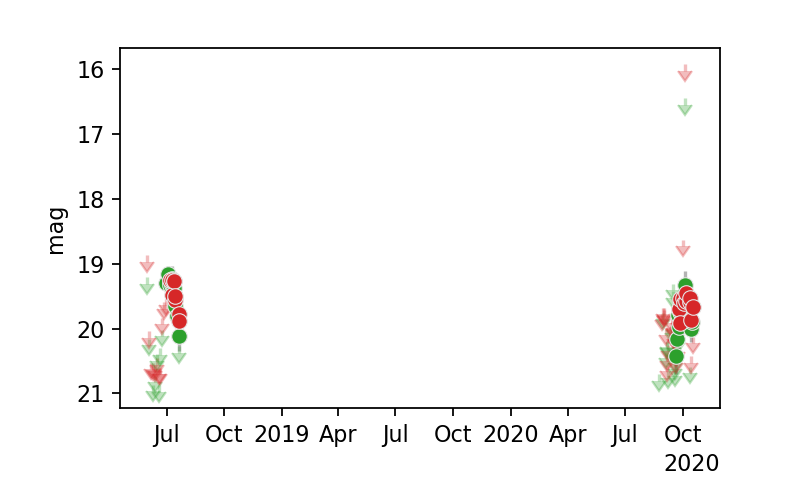

<IPython.core.display.Javascript object>


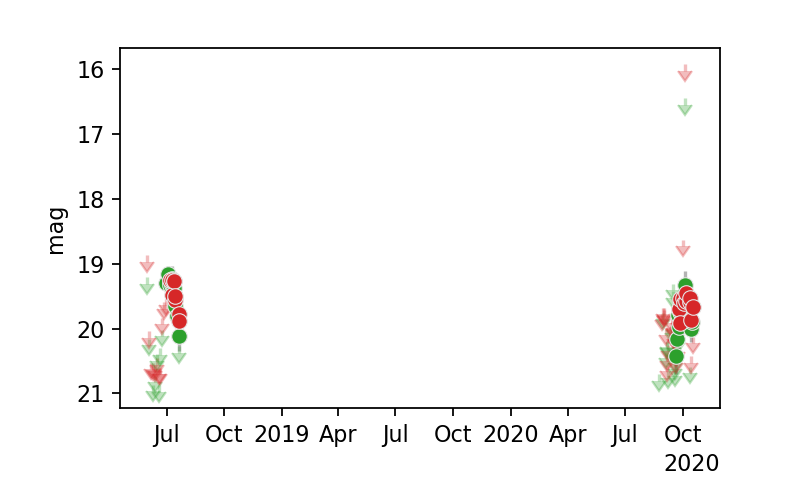

In [39]:
lightcurve_of_one.show()